
# Project 1 


## Title: Investigate a Dataset (TMDB Movie Data)


### Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This project explores a TMDB movie database, a movie database that consists of about 10,000 movies collected from TMDB, inclusive of parameters such as movie titles, casts, genres, budget, revenue, user ratings, popularity and many more...
An end to end analysis of the data from wrangling, cleaning, performing Exploratory data analysis, and making insights and conclusions on the data will be seen in this project, as well as limitations and future work to be done on the analysis.

#### Questions to observe

* Movie with Minimum and Maximum Profits
* Movie with highest and lowest Vote Average
* Most Occuring Genres produced over time
* Can highly rated movies be used to predict the success of a movie based on profits made
* Are longer movies more likely to be as profitable as average timed movies


In [6]:
# Importing libraries to be used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
#set all charts to have a dark background
sns.set_style('darkgrid')

<a id='wrangling'></a>
## Data Wrangling



### General Properties

In [8]:
# Loading the data using pandas read_csv method, and checking the first 5 rows of the data
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [10]:
#check overview to see the columns with null values 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [12]:
#check to see if there are duplicate data across all the rows 
df.duplicated().sum()

1

In [13]:
#check to see the particular row thats a duplicate
df[df.duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


>From the above cells, we have been able to ascertain 2 things,

>We have null values in some specific columns 

>We have duplicate data in our dataset (checks across all columns)

#### Looking at the statistical analysis of the numerical data in the dataset

In [14]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


> From the results above, we realise 50% of the budget column and revenue columns have values of 0...This is highly unlikely for a movie and we assume these are as a result of missing values. 

> It can also be seen majority of the movies were rated highly with an average of ~6, and a 25th percentile of 5.4.

#### To confirm all the datatypes of the columns are right for analysis

In [16]:
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

#### Things to note

> The release date has a datatype of an object rather than a datetime

> There are specific columns that we wouldnt be needing for our analysis and we will need to drop 
('id', 'homepage', 'tagline', 'keywords', 'overview','budget_adj','revenue_adj')


### Data Cleaning 

##### Some of the points noted earlier in the data wrangling stage would be cleaned up here, points such as:

<ul>
    <li> Some columns have null values</li>
    <li> Budget and Revenue columns have half their values as 0 </li>
    <li> Some columns are redundant for this analysis and would be dropped </li>
    <li> Convert datatype of release_date from str to a datetime </li>
    <li> Existence of duplicate data </li>
    <li> Columns like genres, cast and director has a pipe "|" in its row</li>
</ul>

#### We will work with resolving the above listed issues and clean appropriately in this section

> 1. Removing redundant columns 

In [17]:
#dropping all the redundant columns ('id', 'homepage', 'tagline', 'keywords', 'overview','budget_adj','revenue_adj')
#check dataset to confirm columns were dropped accordingly

df.drop(['id', 'homepage', 'tagline', 'keywords', 'overview','budget_adj','revenue_adj'], axis=1, inplace=True)
df

,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015
1,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015
2,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015
3,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015
4,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,Bruce Brown,95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966
10862,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,John Frankenheimer,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966
10863,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,Eldar Ryazanov,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966
10864,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,Woody Allen,80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966


> Correcting the datatype of release_date column to a datetime 

In [20]:
#convert the datatype to from an object to a datetime and confirm

df['release_date'] = pd.to_datetime(df['release_date'])
type(df['release_date'][0])

pandas._libs.tslibs.timestamps.Timestamp

> Remove duplicate data from the dataset

In [21]:
#Remove duplicate data and check to confirm all duplicate data has been duly deleted

df.drop_duplicates(inplace=True) 
df.duplicated().sum()

0

> Dealing with budget and revenue columns with value tagged as 0

> According to TMDB, data with budget/revenue values as 0 are most likely missing values, that would not in any way help with our analysis, so I would be proposing removing all rows with these issues to avoid skewness of our data when analysing 

In [23]:
# Replacing the zeros with null

cols = ['budget','revenue'] 
df[cols] = df[cols].replace(0,np.NaN)

# Droppping the null budget/revenue rows in the dataset
df.dropna(subset=cols, inplace=True)

In [27]:
#check to see the rows were dropped
df[df['budget'] == 0].shape, df[df['revenue'] == 0].shape

((0, 14), (0, 14))

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 10848
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   imdb_id               3854 non-null   object        
 1   popularity            3854 non-null   float64       
 2   budget                3854 non-null   float64       
 3   revenue               3854 non-null   float64       
 4   original_title        3854 non-null   object        
 5   cast                  3850 non-null   object        
 6   director              3853 non-null   object        
 7   runtime               3854 non-null   int64         
 8   genres                3854 non-null   object        
 9   production_companies  3808 non-null   object        
 10  release_date          3854 non-null   datetime64[ns]
 11  vote_count            3854 non-null   int64         
 12  vote_average          3854 non-null   float64       
 13  release_year     

> Handling Null Values in specific columns with null values

In [29]:
#checking the dataset for the null cast values and confirm if they are valid
df[df['cast'].isnull()]

,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
4127,tt0145937,0.193929,3000000.0,13308.0,Naqoyqatsi,NaN,Godfrey Reggio,89,Documentary|Drama|Music|Thriller,Qatsi Productions,2002-09-02,20,6.0,2002
4889,tt2247692,0.075043,2500000.0,33400000.0,2016: Obama's America,NaN,Dinesh D'Souza|John Sullivan,87,Documentary,NaN,2012-07-13,11,4.7,2012
7813,tt0914809,0.065543,6000.0,6000.0,Loose Change: Final Cut,NaN,Dylan Avery,129,Documentary,Louder Than Words,2007-11-11,12,5.1,2007
9564,tt0095895,0.168545,2500000.0,589244.0,Powaqqatsi,NaN,Godfrey Reggio,99,Documentary|Drama|Music,NaN,1988-04-29,18,7.2,1988


In [30]:
#checking the dataset for the null director values and confirm if they are valid
df[df['director'].isnull()]

,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
3276,tt1105733,0.147657,4180000.0,11000000.0,Kismat Konnection,Shahid Kapoor|Vidya Balan|Juhi Chawla|Om Puri|...,NaN,153,Drama|Comedy|Romance|Foreign,Tips Industries,2008-07-18,11,5.8,2008


In [31]:
#checking the dataset for the null cast values and confirm if they are valid
df[df['production_companies'].isnull()]

,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
1758,tt1331064,0.118533,1000000.0,1296971.0,Paper Heart,Michael Cera|Charlyne Yi|Jake Johnson|Gill Sum...,Nicholas Jasenovec,88,Comedy|Drama|Romance,NaN,2009-07-31,17,5.1,2009
1797,tt0981042,0.182881,2500000.0,352810.0,Like Dandelion Dust,Mira Sorvino|Barry Pepper|Cole Hauser|Kate Lev...,Jon Gunn,100,Drama|Family,NaN,2009-02-05,11,7.0,2009
1800,tt1220628,0.190162,7000000.0,1429299.0,I Hope They Serve Beer in Hell,Matt Czuchry|Jesse Bradford|Marika Dominczyk|T...,Bob Gosse,106,Comedy|Drama,NaN,2009-09-25,11,5.6,2009
1871,tt1489167,0.092519,31192.0,10000.0,Down Terrace,Robert Hill|Robin Hill|Julia Deakin|David Scha...,Ben Wheatley,89,Drama|Action|Comedy,NaN,2009-09-01,15,6.5,2009
2303,tt1572491,0.181532,7000000.0,3218666.0,Balada triste de trompeta,Santiago Segura|Antonio de la Torre|RaÃºl ArÃ©...,Ãlex de la Iglesia,101,Drama|Action|Thriller|Foreign,NaN,2010-12-17,44,6.2,2010
2782,tt0265632,0.501163,10000000.0,44460850.0,Recess: School's Out,Rickey D'Shon Collins|Jason Davis|Ashley Johns...,Chuck Sheetz,83,Animation|Comedy|Family,NaN,2001-01-27,42,6.5,2001
2805,tt0258273,0.251798,250000.0,4186931.0,Lovely & Amazing,Catherine Keener|Brenda Blethyn|Emily Mortimer...,Nicole Holofcener,91,Comedy|Drama|Romance,NaN,2001-08-31,10,6.3,2001
2840,tt0242587,0.185009,700000.0,1667192.0,L.I.E. Long Island Expressway,Paul Dano|Bruce Altman|Brian Cox|Billy Kay|Jam...,Michael Cuesta,97,Drama,NaN,2001-01-20,13,5.2,2001
3047,tt0976247,0.518011,6000000.0,69497.0,"Surfer, Dude",Matthew McConaughey|Jeffrey Nordling|Willie Ne...,S.R. Bindler,85,Comedy,NaN,2008-09-05,13,5.0,2008
3077,tt1018785,0.451304,27000000.0,44352417.0,The Sisterhood of the Traveling Pants 2,Alexis Bledel|Amber Tamblyn|America Ferrera|Bl...,Sanaa Hamri,117,Adventure|Comedy|Drama|Family,NaN,2008-08-06,127,6.0,2008


> It is observed that all the rows where these specific columns have null values are actually valid rows based on the data we can see from the other columns, so it would not be advisable to go ahead removing the rows or replacing the values.

> Handling columns with pipes as separators, I have taken the liberty to write:
>
> A function that can seperate a columns content that has a pipe "|" seperator within its rows.
>
> The said function would return a count of values in that column.

In [32]:
def char_count(col):
    
    # join the content of the column together with pipe "|" as a seperator
    total = df[col].str.cat(sep='|')
    
    # turning the above to a pandas series
    total_series = pd.Series(total.split('|'))
    
    # counting the value of the series
    count = total_series.value_counts()
    
    return count

# testing
cast_count = char_count('cast')
cast_count.head()

Robert De Niro       52
Bruce Willis         46
Samuel L. Jackson    44
Nicolas Cage         43
Matt Damon           36
dtype: int64

> As seen, we have tackled the observed issues so far noticed in the data wrangling, and have cleaned the data accordingly, we will now move to exploring the data better for more analysis 

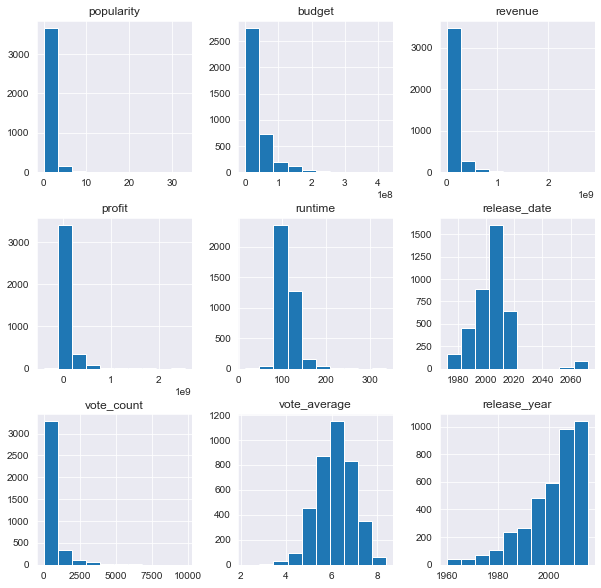

In [53]:
#observing the graphical view of the data
df.hist(figsize = (10,10));

> We can see a graphical view of the data, notice how the runtime is really restricted to a time range which is expected since the typical timing of a movie spans across 120mins. We can look into this to check if we would observe outliers in the runtime data

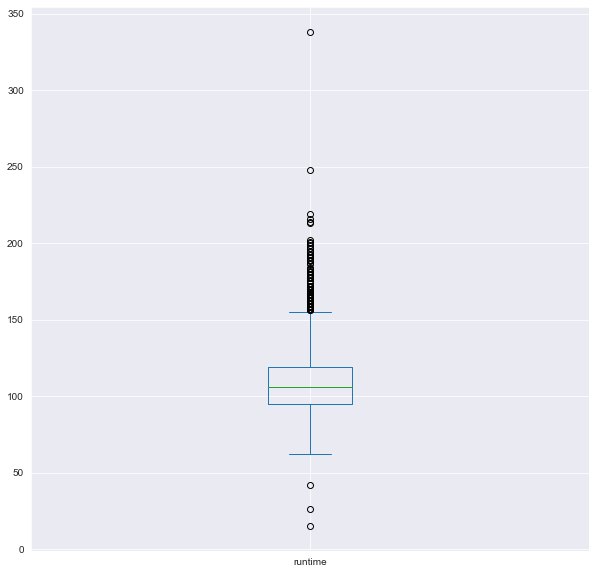

In [54]:
# A boxplot to check if the runtime data does not have outliers, and if it does, observe the rows 
#that fall in that range

df.runtime.plot(kind='box', figsize=(10,10));

> This confirms our imaginations, and we would like to explore further to see the rows that actually fall within these ranges 

In [58]:
#check for runtime of movies above 3hrs
df[df['runtime'] >= 200]

,imdb_id,popularity,budget,revenue,profit,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
2107,tt1321865,0.534192,18000000.0,8.712790e+05,-1.712872e+07,Carlos,Edgar RamÃ­rez|Alexander Scheer|Fadi Abi Samra...,Olivier Assayas,338,Crime|Drama|Thriller|History,Egoli Tossell Film AG|Canal+|Arte France|Films...,2010-05-19,35,6.2,2010
3110,tt0449994,0.389554,8376800.0,1.300000e+07,4.623200e+06,Jodhaa Akbar,Hrithik Roshan|Aishwarya Rai Bachchan|Sonu Soo...,Ashutosh Gowariker,213,Action|Adventure|Drama|Foreign|History,UTV Motion Pictures|Ashutosh Gowariker Product...,2008-02-15,48,7.8,2008
4949,tt0167260,7.122455,94000000.0,1.118889e+09,1.024889e+09,The Lord of the Rings: The Return of the King,Elijah Wood|Ian McKellen|Viggo Mortensen|Liv T...,Peter Jackson,201,Adventure|Fantasy|Action,WingNut Films|New Line Cinema,2003-12-01,5636,7.9,2003
5065,tt0279111,0.469518,56000000.0,1.292394e+07,-4.307606e+07,Gods and Generals,Stephen Lang|Jeff Daniels|Robert Duvall|Kevin ...,Ronald F. Maxwell,214,Drama|History|War,Turner Pictures|Antietam Filmworks,2003-02-21,23,5.8,2003
7332,tt0080855,0.418950,44000000.0,3.484331e+06,-4.051567e+07,Heaven's Gate,Kris Kristofferson|Christopher Walken|John Hur...,Michael Cimino,219,Action|Drama|History|Western,United Artists,1980-11-19,18,6.0,1980
8282,tt0104797,0.648937,34000000.0,4.816991e+07,1.416991e+07,Malcolm X,Denzel Washington|Angela Bassett|Albert Hall|A...,Spike Lee,202,Drama|History,JVC Entertainment|Warner Bros.,1992-11-18,201,7.0,1992
9758,tt0071562,3.264571,13000000.0,4.754284e+07,3.454284e+07,The Godfather: Part II,Al Pacino|Robert Duvall|Diane Keaton|Robert De...,Francis Ford Coppola,200,Drama|Crime,Paramount Pictures|The Coppola Company,1974-12-20,2131,8.1,1974
9850,tt0056172,1.168767,15000000.0,7.000000e+07,5.500000e+07,Lawrence of Arabia,Peter O'Toole|Alec Guinness|Anthony Quinn|Jack...,David Lean,216,Adventure|Drama|History|War,Horizon Pictures (II),2062-12-10,517,7.5,1962
10443,tt0056937,0.804533,31115000.0,5.775000e+07,2.663500e+07,Cleopatra,Elizabeth Taylor|Richard Burton|Rex Harrison|R...,Joseph L. Mankiewicz|Rouben Mamoulian|Darryl F...,248,Drama|History|Romance,Twentieth Century Fox Film Corporation|MCL Fil...,2063-06-12,68,6.3,1963


> There are 9 movies that fall in this category, 'Carlos' in particular with the highest runtime of about almost 6hours, after thorough investigation, I noticed to be a mini series, hence the lengthy time. 

In [59]:
#check for runtime of movies less than 50mins
df[df['runtime'] < 50]

,imdb_id,popularity,budget,revenue,profit,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
3239,tt1227926,0.352054,200000.0,3.0,-199997.0,Dr. Horrible's Sing-Along Blog,Neil Patrick Harris|Nathan Fillion|Felicia Day...,Joss Whedon,42,Adventure|Action|Comedy|Science Fiction|Music,NaN,2008-07-15,140,7.7,2008
5162,tt0368574,0.208637,10.0,5.0,-5.0,Kid's Story,Clayton Watson|Keanu Reeves|Carrie-Anne Moss|K...,Shinichiro Watanabe,15,Science Fiction|Animation,Studio 4Â°C,2003-06-02,16,6.8,2003
8005,tt0085936,0.592219,3000000.0,21000000.0,18000000.0,Mickey's Christmas Carol,Alan Young|Wayne Allwine|Clarence Nash|Hal Smi...,Burny Mattinson,26,Family|Animation,Walt Disney Pictures,1983-10-19,89,7.4,1983


> After thorough findings, the movies that we can observe here are short movies, with lesser timing than expected. As a result of the disparity between the budget and revenue of movie with id 'tt1227926', its advisable to remove this row as it directly affects independent/dependent variables that would be used in making decisions on the data, and we want to avoid this skewing our data and giving misinformation

In [60]:
#drop the specific row
df = df[df['imdb_id'] != 'tt1227926']

In [64]:
#check to confirm row is not available 
df[df['imdb_id'] == 'tt1227926']

,imdb_id,popularity,budget,revenue,profit,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year


<a id='eda'></a>
## Exploratory Data Analysis

> **Observation**: I observed a profit column would be great to add to the dataset, just after the revenue.


In [38]:
# adding a profit column (revenue - budget)
df.insert(4, 'profit', df['revenue'] - df['budget']) 

In [39]:
#checking if it works out
df.head()

,imdb_id,popularity,budget,revenue,profit,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,tt0369610,32.985763,150000000.0,1.513529e+09,1.363529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015
1,tt1392190,28.419936,150000000.0,3.784364e+08,2.284364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015
2,tt2908446,13.112507,110000000.0,2.952382e+08,1.852382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015
3,tt2488496,11.173104,200000000.0,2.068178e+09,1.868178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015
4,tt2820852,9.335014,190000000.0,1.506249e+09,1.316249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015


### Movie with minimum and maximum Profit
> We can function that returns a dataframe of maximum and minimum rows based on different parameters. This function will be used across different columns for details. 

In [40]:
def max_min(colm):
    
    # storing max id
    idmax = df[colm].idxmax()
    
    # storing min id
    idmin = df[colm].idxmin() 
    
     # bringing out ths max row
    maximum = pd.DataFrame(df.loc[idmax])
    
    # bringing out the min row
    minimum = pd.DataFrame(df.loc[idmin]) 
    
    # concatenating both rows
    rows = pd.concat([maximum,minimum], axis =1) 
    
    # returning both as result
    return rows

In [41]:
max_min('profit')

,1386,2244
imdb_id,tt0499549,tt1032751
popularity,9.432768,0.25054
budget,237000000.0,425000000.0
revenue,2781505847.0,11087569.0
profit,2544505847.0,-413912431.0
original_title,Avatar,The Warrior's Way
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director,James Cameron,Sngmoo Lee
runtime,162,100
genres,Action|Adventure|Fantasy|Science Fiction,Adventure|Fantasy|Action|Western|Thriller


> We can see Avatar was the movie that was most profitable, while "The warriors day" was least profitable. A distinctive difference to see here is that the budget for the latter is way more than what we have for Avatar and yet it brought it way lesser profit. This could tell that profit might not be super dependent on the amount spent in making a movie.

### Movie with highest and lowest Vote Average

In [42]:
max_min('vote_average')

,4178,4859
imdb_id,tt0111161,tt0249516
popularity,7.192039,0.111351
budget,25000000.0,65000000.0
revenue,28341469.0,73706.0
profit,3341469.0,-64926294.0
original_title,The Shawshank Redemption,Foodfight!
cast,Tim Robbins|Morgan Freeman|Bob Gunton|William ...,Charlie Sheen|Wayne Brady|Hilary Duff|Eva Long...
director,Frank Darabont,Lawrence Kasanoff
runtime,142,87
genres,Drama|Crime,Animation|Action|Comedy|Family


> From this summary, we see the statistics of the most rated movie and worst rated movie post release. It can be seen that movies rated really well have positive returns on profits made, while poorly rated movies are seen to be negatively impacted with really poor popularity ratings.. More on the relationships of the data with graphical representations will be seen below.

### Count of most produced genres

In [47]:
#displaying the count of occurences of the various genres
genre_occurence = char_count('genres').sort_values()
genre_occurence

TV Movie              1
Foreign              13
Documentary          35
Western              52
War                 119
History             129
Music               136
Animation           201
Mystery             344
Fantasy             396
Family              425
Horror              463
Science Fiction     519
Crime               651
Romance             667
Adventure           749
Action             1085
Thriller           1204
Comedy             1358
Drama              1756
dtype: int64

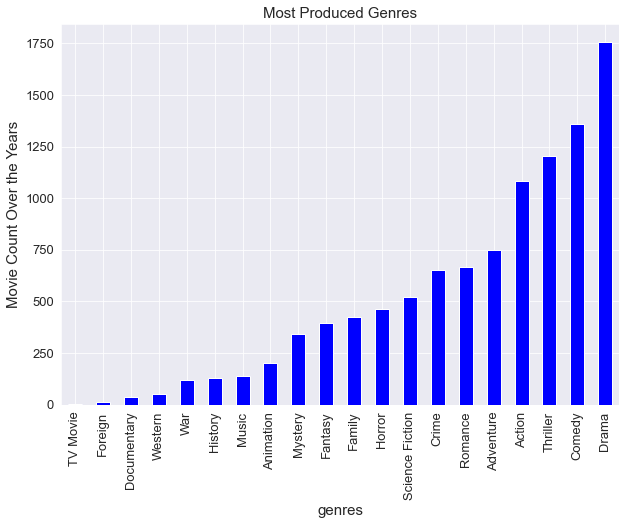

In [49]:
#This can be better displayed on a chart

mst_genres = genre_occurence.plot(kind='bar', figsize=(10,7), color='b')
mst_genres.set_title('Most Produced Genres', fontsize=15)
mst_genres.set_xlabel('genres', fontsize=15)
mst_genres.set_ylabel('Movie Count Over the Years', fontsize=15)
mst_genres.tick_params(labelsize=13)

> We can see that from the data we have available, the most frequent genres are labelled above and drama and comedy are one of the most produced genres in the movie industry till date

### Relationship between Vote_Average and Profit made 

> We want to check the relationship between Vote Average and Profits made, we plan to split the ratings into specific categories based on the statistical information of the column, and map out the categories from there

> Categories to be considered are "Low" (between minimum value and 25th percentile), "Below Medium" (25th - 50th percentile), "Medium" (50th - 75th percentile), "High" (75th percentile to maximum value) 

In [66]:
#splitting the ratings to 5bins to see the differences clearly
df.describe()['vote_average']

count    3853.000000
mean        6.167765
std         0.794640
min         2.200000
25%         5.700000
50%         6.200000
75%         6.700000
max         8.400000
Name: vote_average, dtype: float64

In [67]:
# Bin edges that will be used to "cut" the data into groups
bin_edges = [2.200000, 5.700000, 6.200000, 6.700000, 8.400000]
# Labels for the four rating groups
bin_names = ['Low' , 'Below Average', 'Average', 'High']
#create vote ratings group column
df['ratings_group'] = pd.cut(df['vote_average'], bin_edges, labels=bin_names)

C:\Users\OLUWAT~1.OJO\AppData\Local\Temp/ipykernel_86904/1347434017.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ratings_group'] = pd.cut(df['vote_average'], bin_edges, labels=bin_names)


In [71]:
#confirm the column was created as required 
df.head()

,imdb_id,popularity,budget,revenue,profit,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,ratings_group
0,tt0369610,32.985763,150000000.0,1.513529e+09,1.363529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,Above Average
1,tt1392190,28.419936,150000000.0,3.784364e+08,2.284364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,High
2,tt2908446,13.112507,110000000.0,2.952382e+08,1.852382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,Above Average
3,tt2488496,11.173104,200000000.0,2.068178e+09,1.868178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,High
4,tt2820852,9.335014,190000000.0,1.506249e+09,1.316249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,High


In [73]:
#Check how the rating groups relate with the profits made for the class
df.groupby('ratings_group').sum()['profit']

ratings_group
Low              3.165161e+10
Medium           5.583732e+10
Above Average    6.859650e+10
High             1.156209e+11
Name: profit, dtype: float64

Text(0.5, 1.0, 'Chart to show relationship between profits and user rating')

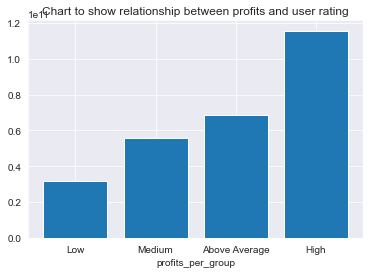

In [82]:
#plot this on a bar chart to improve visibility 
df_ratinggroup = df.groupby('ratings_group').sum()['profit']
#df_ratinggroup.plot(kind = 'bar', figsize = (10,10));
plt.bar(df_ratinggroup.index, df_ratinggroup)
plt.xlabel('vote_average_groups', fontsize=10)
plt.xlabel('profits_per_group', fontsize=10)
plt.title('Chart to show relationship between profits and user rating')

> This shows that the ratings and profit from a particular movie are highly correlated, as highly rated movies are the ones generating the most profits, we can easily predict that for movies that rated highly, the profits that would be grossed on such a movie would be high.

#### Relationship between Profit & Runtime

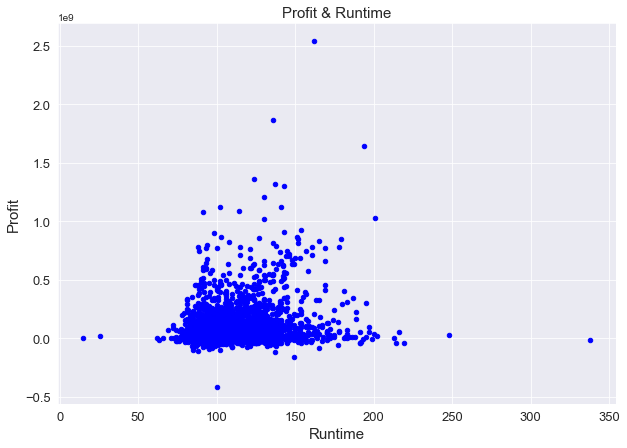

In [96]:
# Showing the relationship with scatter plot
scatter_plot = df.plot.scatter(x='runtime', y='profit',c='b',figsize=(10,7))
scatter_plot.set_title('Profit & Runtime', fontsize=15) 
scatter_plot.set_xlabel('Runtime', fontsize=15) 
scatter_plot.set_ylabel('Profit',fontsize=15) 
scatter_plot.tick_params(labelsize=13); 

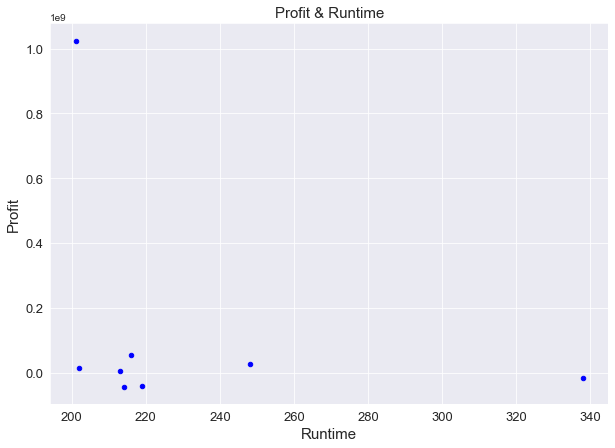

In [97]:
#Getting the plot for movies for 3hrs and above
scatter_plot = df[df['runtime']>200].plot.scatter(x='runtime', y='profit',c='b',figsize=(10,7))
scatter_plot.set_title('Profit & Runtime', fontsize=15) 
scatter_plot.set_xlabel('Runtime', fontsize=15) 
scatter_plot.set_ylabel('Profit',fontsize=15) 
scatter_plot.tick_params(labelsize=13); 

> From the charts, we can see that profit is strongly correlated with the runtime, and majority of movies made fall within the less than 2hrs margin. We also notice longer movies, 3hrs and above do not amass the level of profits we have compared to the 2hrs movies.

### Vote Average Distribution


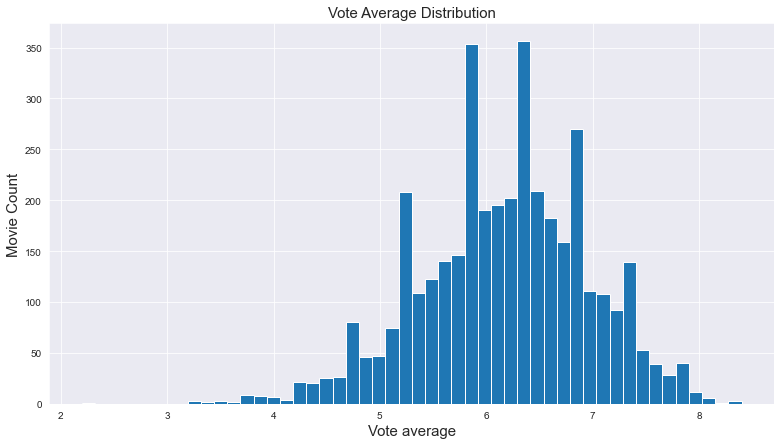

In [98]:
# showing distribution with a histogram
hist_vote = df['vote_average']
plt.figure(figsize=(13,7))
plt.hist(hist_vote,bins=50)
plt.title('Vote Average Distribution',fontsize=15)
plt.xlabel('Vote average', fontsize=15)
plt.ylabel('Movie Count', fontsize=15);

### Runtime Distribution

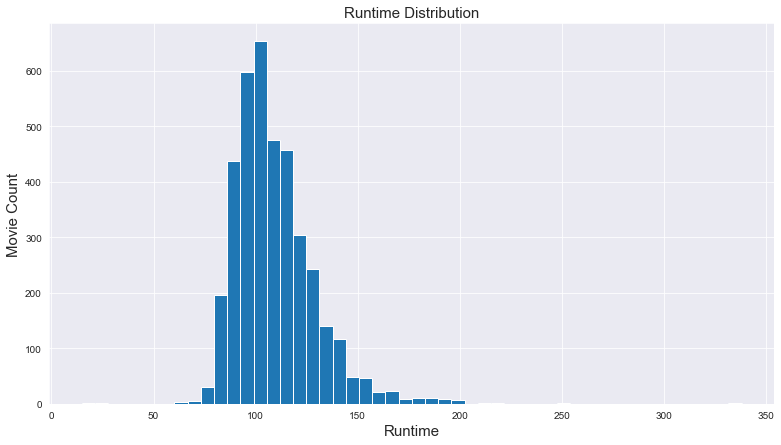

In [100]:
# showing distribution with a histogram
runtime_h = df['runtime']
plt.figure(figsize=(13,7))
plt.hist(runtime_h,bins=50)
plt.title('Runtime Distribution',fontsize=15)
plt.xlabel('Runtime', fontsize=15)
plt.ylabel('Movie Count', fontsize=15);

<a id='conclusions'></a>
## Conclusions


>Kindly find a short summary of what we were able to establish

* **The Warrior's Way** movie has the highest budget, but it is also the same movie with the minimum profit. 
* **Avatar** is the movie with highest profit and revenue.
* **Drama** is the most produced movie genre.
* There is a positive relationship between rating and profit.
* Profit and vote averaged has a positive relationship, on the scatter plot, the highest profit fall among the highest vote rating.
* Vote average increases as the vote count increase.
* Popularity of movie is not dependent on the vote count.
* Movies with runtime generally greater than 200 minutes are not as popular as movies with shorter timeframe. 

>**Limitation of the analysis**
* The currency of the data was not given. There's a high probability that most of the financial column could be in different currency, meaning it would affect our analysis result.
* Our analysis is mainly descriptive, to get a better view of future predictions, we would want to explore the use of data science and machine learning algorithms